# Variables to study

Recompute the comparison statistics for one variable of each type:
1. __short__: /status/satellite/leap_second_value
2. __ushort__: /data/calibration/counts_coldview_average_over_scans
3. __int__: /data/calibration/inst_temperature
4. __uint__: /status/instrument/mws_sce_register_status
5. __uint64__: /status/instrument/mws_function_status
6. __double__: /status/satellite/semi_major_axis
7. __float__: /status/instrument/channel_central_freq
8. __byte__: /status/satellite/manoeuvre_items
9. __ubyte__: /status/instrument/mws_icu_in_use
10. __string__: /status/instrument/instrument_mode

# Files

__Test file:__ /mnt/dl380-data/EPS-SG/data/mws_l1_lp/MWSL1LP-SCI-01/TDS-2/output/mws_l1/W_XX-EUMETSAT-Darmstadt,SAT,SGA1-MWS-1B-RAD_C_EUMT_20230810060827_G_D_20070912084758_20070912084859_T_N_ISD.nc

__Ref file:__ /mnt/dl380-data/EPS-SG/data/mws_l1_lp/MWSL1LP-SCI-01/TDS-2/output/mws_l1/W_XX-EUMETSAT-Darmstadt,SAT,SGA1-MWS-1B-RAD_C_EUMT_20230810060827_G_D_20070912084758_20070912084859_T_N____.nc

## Import Packages

In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

## Functions

In [2]:
def read_nc(file_path, var_path):
    # Open the NetCDF file
    try:
        nc_file = nc.Dataset(file_path, 'r')
    except:
        print("Error opening the NetCDF file.")
    
    try:
        # Access the variable
        variable = nc_file[var_path]
        # Get the values as a NumPy array
        var_arr = variable[:]
        # Return variable and values
        return variable, var_arr
    except:
        print("Variable not found in the NetCDF file.")
        return 
    
    # Close the NetCDF file
#     nc_file.close()
    

def stats(d1, d2):
    if len(d1) == len(d2):
        # Difference array
        dif = np.subtract(d1, d2, dtype=np.float64)
        # Mean
        mean = np.mean(dif)
        # Min & Max (absolute value)
        minim = dif[dif != 0]
        if len(minim) != 0:
            minim = abs(minim.min())
        else:
            minim = 0
        maxim = abs(dif.max())
        # RMS
        rms = np.sqrt(1/len(d1) * np.sum(np.square(dif)))
    else:
        print("Error when computing stats. Length missmatch:\nLenght First:", len(d1),"\nLenght Second:", len(d2))
    
    return f'{mean:.3e}', f'{minim:.3e}', f'{maxim:.3e}', f'{rms:.3e}', dif

def stats_nan(d1, d2):
    if len(d1) == len(d2):
        # Difference array
        dif = np.subtract(d1, d2, dtype=np.float64)
        
        # Mean (ignoring NaN)
        mean = np.nanmean(dif)
        
        # Min & Max (absolute value, ignoring NaN)
        minim = np.nanmin(np.abs(dif))
        maxim = np.nanmax(np.abs(dif))
        
        # RMS (ignoring NaN)
        rms = np.sqrt(1/len(d1) * np.nansum(np.square(dif)))
    else:
        print("Error when computing stats. Length mismatch:\nLength First:", len(d1), "\nLength Second:", len(d2))
    
    return f'{mean:.3e}', f'{minim:.3e}', f'{maxim:.3e}', f'{rms:.3e}', dif

def search_nan(d1, d2):
    # Initialize counters
    total_nan, n1, n2 = 0, 0, 0
    # Count NaNs for each dataset
    mask1 = np.isnan(d1)
    n1 = len(mask1[mask1 == True])
    mask2 = np.isnan(d2)
    n2 = len(mask2[mask2 == True])
    # Count all NaNs
    if (n1 != 0) or (n2 != 0):
        total_nan = n1 + n2
        nan_pos = np.sum(np.logical_and(np.isnan(d1), np.isnan(d2)))
        print(" Total NaNs:", total_nan, "\n NaNs in First dataset:", n1, "\n NaNs in Second dataset:", n2, "\n Concurrent NaNs:", nan_pos)
    else:
        print(" No NaNs found!")

# 1. Short: leap_second_value

In [3]:
test_path = "/mnt/dl380-data/EPS-SG/data/mws_l1_lp/MWSL1LP-SCI-01/TDS-2/output/mws_l1/W_XX-EUMETSAT-Darmstadt,SAT,SGA1-MWS-1B-RAD_C_EUMT_20230810060827_G_D_20070912084758_20070912084859_T_N_ISD.nc"
ref_path  = "/mnt/dl380-data/EPS-SG/data/mws_l1_lp/MWSL1LP-SCI-01/TDS-2/output/mws_l1/W_XX-EUMETSAT-Darmstadt,SAT,SGA1-MWS-1B-RAD_C_EUMT_20230810060827_G_D_20070912084758_20070912084859_T_N____.nc"
var_path  = "/status/satellite/leap_second_value"

# General information
info_leap_t, var_leap_t = read_nc(test_path, var_path)
info_leap_r, var_leap_r = read_nc(ref_path, var_path)
print("Test file:\n\n", info_leap_t,"\n")
print("Value:", var_leap_t, "\n-------------------\nReference file:\n")
print(info_leap_r,"\n")
print("Value:", var_leap_r)
print("-"*127)

# Statistics
var_1 = var_leap_t.data.flatten()
var_2 = var_leap_r.data.flatten()
mean, minim, maxim, rsm, dif = stats(var_1, var_2)
print("Statistics for leap_second_value:")
print("Mean:", mean, "\nMinimum:", minim, "\nMaximum:", maxim, "\nRSM:", rsm)
print("-"*127)

# NaN values
print("NaN occurances")
search_nan(var_1, var_2)
print("-"*127)
print("Discrepancies\n ---------------------")
count = 0
thresh = 0
for i in range(len(var_1)):
    if var_1[i] != var_2[i]:
        abs_dif = abs(var_1[i] - var_2[i])
        print(" Index:", i)
        print(" Ref Value:", var_2[i])
        print(" Test Value:", var_1[i])
        print(" Abs Difference:", abs_dif)
        if abs_dif > thresh:
            count +=1
            print(" Outside Tolerance: Yes")
        else:
            print(" Outside Tolerance: No")
        print(" ----------------------")
print("-"*127)
print("Total Discrepancies outside tolerance:", count)

Test file:

 <class 'netCDF4._netCDF4.Variable'>
int16 leap_second_value()
    long_name: Value of leap second in product (1, 0 or -1)
    units: s
    valid_min: -1
    valid_max: 1
    missing_value: -999
path = /status/satellite
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -32767 used 

Value: 1 
-------------------
Reference file:

<class 'netCDF4._netCDF4.Variable'>
int16 leap_second_value()
    long_name: Value of leap second in product (1, 0 or -1)
    units: s
    valid_min: -1
    valid_max: 1
    missing_value: -999
path = /status/satellite
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -32767 used 

Value: 0
-------------------------------------------------------------------------------------------------------------------------------
Statistics for leap_second_value:
Mean: 1.000e+00 
Minimum: 1.000e+00 
Maximum: 1.000e+00 
RSM: 1.000e+00
-------------------------------------------------------------------------------

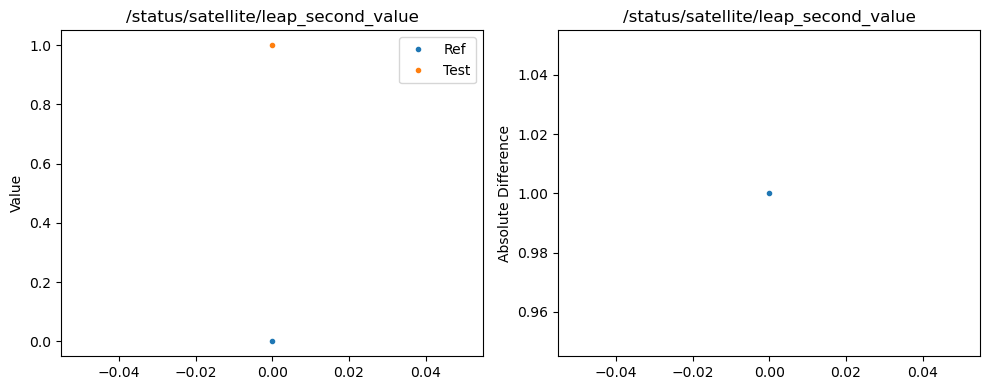

In [4]:
# Create a 1x2 grid for subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first subplot in the first column
axs[0].plot(var_leap_r.flatten(), ".", label="Ref")
axs[0].plot(var_leap_t.flatten(), ".", label="Test")
axs[0].legend(loc="upper right")
axs[0].set_title('/status/satellite/leap_second_value')
axs[0].set_ylabel('Value')

# Plot the second subplot in the second column
axs[1].plot(dif, ".")
axs[1].set_title('/status/satellite/leap_second_value')
axs[1].set_ylabel('Absolute Difference')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# 2. UShort: counts_coldview_average_over_scans

In [5]:
test_path = "/mnt/dl380-data/EPS-SG/data/mws_l1_lp/MWSL1LP-SCI-01/TDS-2/output/mws_l1/W_XX-EUMETSAT-Darmstadt,SAT,SGA1-MWS-1B-RAD_C_EUMT_20230810060827_G_D_20070912084758_20070912084859_T_N_ISD.nc"
ref_path  = "/mnt/dl380-data/EPS-SG/data/mws_l1_lp/MWSL1LP-SCI-01/TDS-2/output/mws_l1/W_XX-EUMETSAT-Darmstadt,SAT,SGA1-MWS-1B-RAD_C_EUMT_20230810060827_G_D_20070912084758_20070912084859_T_N____.nc"
var_path  = "/data/calibration/counts_coldview_average_over_scans"

# General information
info_cold_t, var_cold_t = read_nc(test_path, var_path)
info_cold_r, var_cold_r = read_nc(ref_path, var_path)
print("Test file:\n\n", info_cold_t,"\n")
print("Number of Samples:", len(var_cold_t.flatten()))
print("----------------------\nReference file:\n")
print(info_cold_r,"\n")
print("Number of Samples:", len(var_cold_r.flatten()))
print("-"*127)

# Statistics
var_1 = var_cold_t.data.flatten()
var_2 = var_cold_r.data.flatten()
mean, minim, maxim, rsm, dif = stats(var_1, var_2)
print("Statistics for counts_coldview_average_over_scans:")
print(" Mean:", mean, "\n Minimum:", minim, "\n Maximum:", maxim, "\n RSM:", rsm)
print("-"*127)

# NaN values
print("NaN occurances")
search_nan(var_1, var_2)
print("-"*127)
print("Discrepancies\n ---------------------")
count = 0
thresh = 1
for i in range(len(var_cold_r.flatten())):
    if var_cold_r.flatten()[i] != var_cold_t.flatten()[i]:
        abs_dif = abs(var_cold_r.flatten()[i] - var_cold_t.flatten()[i])
        print(" Index:", i)
        print(" Ref Value:", var_cold_r.flatten()[i])
        print(" Test Value:", var_cold_t.flatten()[i])
        print(" Abs Difference:", abs_dif)
        if abs_dif > thresh:
            count +=1
            print(" Outside Tolerance: Yes")
        else:
            print(" Outside Tolerance: No")
        print(" ----------------------")
print("-"*127)
print("Total Discrepancies outside tolerance:", count)

Test file:

 <class 'netCDF4._netCDF4.Variable'>
uint16 counts_coldview_average_over_scans(n_scans, n_channels)
    long_name: Cold view counts averaged (over scans) around current scan line
    units: counts
    valid_min: 1
    valid_max: 65534
    missing_value: 65535
path = /data/calibration
unlimited dimensions: 
current shape = (27, 24)
filling on, default _FillValue of 65535 used 

Number of Samples: 648
----------------------
Reference file:

<class 'netCDF4._netCDF4.Variable'>
uint16 counts_coldview_average_over_scans(n_scans, n_channels)
    long_name: Cold view counts averaged (over scans) around current scan line
    units: counts
    valid_min: 1
    valid_max: 65534
    missing_value: 65535
path = /data/calibration
unlimited dimensions: 
current shape = (27, 24)
filling on, default _FillValue of 65535 used 

Number of Samples: 648
-------------------------------------------------------------------------------------------------------------------------------
Statistics for 

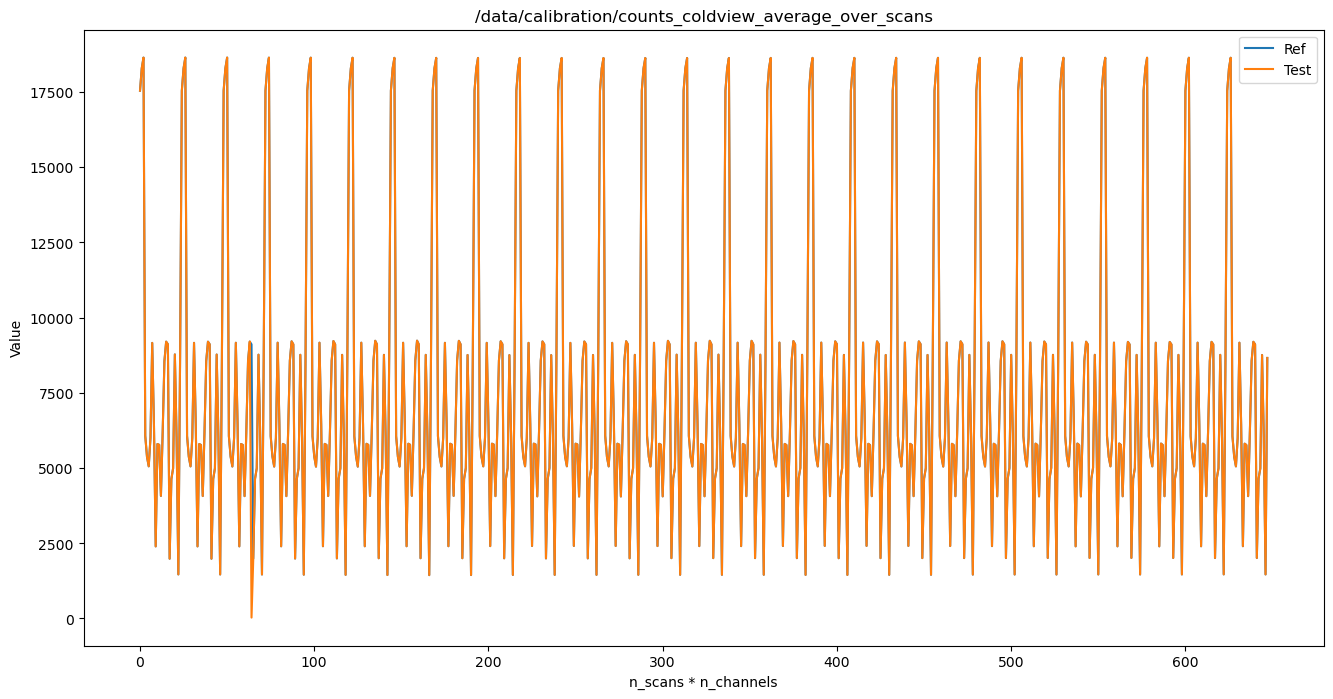

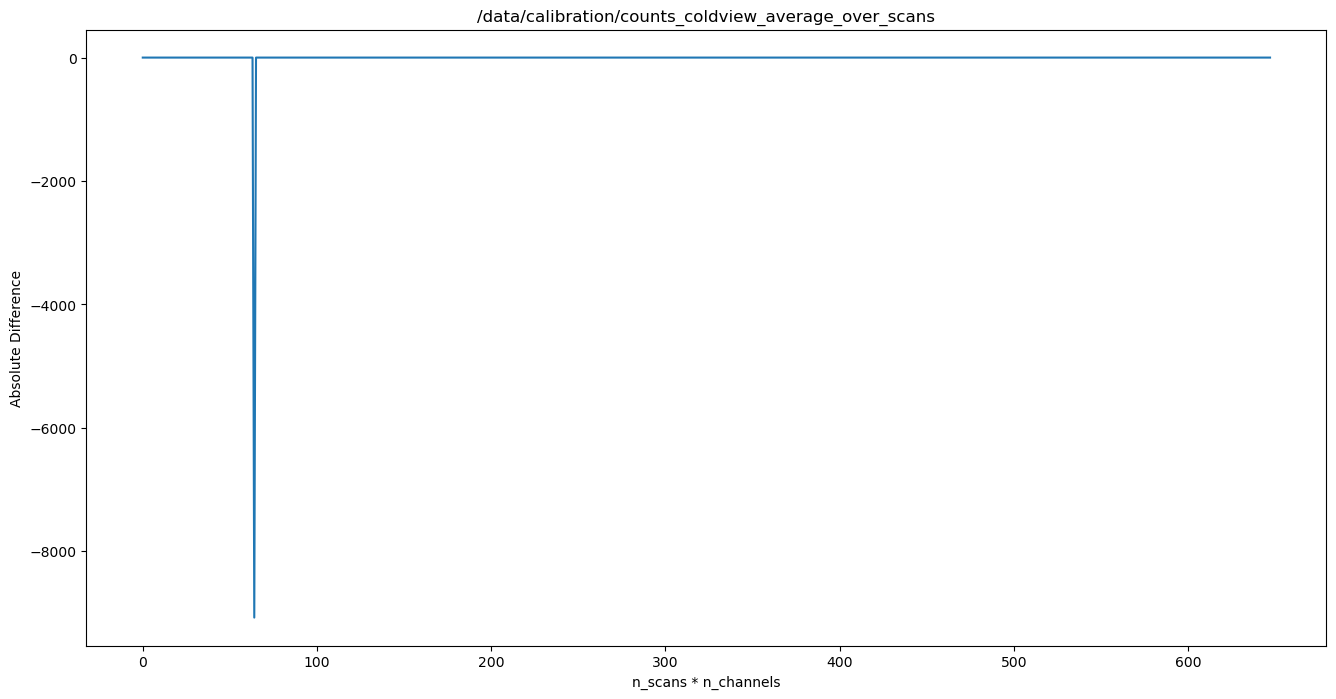

In [6]:
plt.figure(figsize=(16, 8))
plt.xlabel('n_scans * n_channels')
plt.ylabel('Value')
plt.title('/data/calibration/counts_coldview_average_over_scans')
plt.plot(var_cold_r.flatten(), label="Ref")
plt.plot(var_cold_t.flatten(), label="Test")
plt.legend(loc="upper right")
plt.show()

plt.figure(figsize=(16, 8))
plt.xlabel('n_scans * n_channels')
plt.ylabel('Absolute Difference')
plt.title('/data/calibration/counts_coldview_average_over_scans')
plt.plot(dif)
plt.show()

# 3. Int: inst_temperature (Solved)

In [7]:
test_path = "/mnt/dl380-data/EPS-SG/data/mws_l1_lp/MWSL1LP-SCI-01/TDS-2/output/mws_l1/W_XX-EUMETSAT-Darmstadt,SAT,SGA1-MWS-1B-RAD_C_EUMT_20230810060827_G_D_20070912084758_20070912084859_T_N_ISD.nc"
ref_path  = "/mnt/dl380-data/EPS-SG/data/mws_l1_lp/MWSL1LP-SCI-01/TDS-2/output/mws_l1/W_XX-EUMETSAT-Darmstadt,SAT,SGA1-MWS-1B-RAD_C_EUMT_20230810060827_G_D_20070912084758_20070912084859_T_N____.nc"
var_path  = "/data/calibration/inst_temperature"

# General information
info_temp_t, var_temp_t = read_nc(test_path, var_path)
info_temp_r, var_temp_r = read_nc(ref_path, var_path)
print("Test file:\n\n", info_temp_t,"\n")
print("Number of Samples:", len(var_temp_t.flatten()))
print("----------------------\nReference file:\n")
print(info_temp_r,"\n")
print("Number of Samples:", len(var_temp_r.flatten()))
print("-"*127)

# Statistics
var_1 = var_temp_t.data.flatten()
var_2 = var_temp_r.data.flatten()
mean, minim, maxim, rsm, dif = stats(var_1, var_2)
print("Statistics for inst_temperature:")
print(" Mean:", mean, "\n Minimum:", minim, "\n Maximum:", maxim, "\n RSM:", rsm)
print("-"*127)

# NaN occurances & New Statistics
sf   = info_temp_t.getncattr("scale_factor")
vmax = info_temp_t.getncattr("valid_max")
vmin = info_temp_t.getncattr("valid_min")
miss = info_temp_t.getncattr("missing_value")
# Apply Scale Factor
new_var_t = var_temp_t.data/sf
new_var_r = var_temp_r.data/sf
# Apply Masks
mask_t = np.logical_or(new_var_t < vmin, new_var_t > vmax)
mask_r = np.logical_or(new_var_r < vmin, new_var_r > vmax)
mask = np.logical_or(mask_t, mask_r)
mask_var_t = np.where(mask, np.nan, new_var_t)
mask_var_r = np.where(mask, np.nan, new_var_r)
# NaN values
print("Total NaN occurances:", np.sum(mask))
print("Test NaN occurances:", np.sum(mask_t))
print("Ref NaN occurances:", np.sum(mask_r))
print("-"*127)
mean, minim, maxim, rsm, dif = stats_nan(mask_var_t, mask_var_r)
print("NEW Statistics for inst_temperature:")
print(" Mean:", mean, "\n Minimum:", minim, "\n Maximum:", maxim, "\n RSM:", rsm)
print("-"*127)

print("Discrepancies\n ---------------------")
count = 0
thresh = 1
for i in range(len(new_var_t)):
    if new_var_t[i] != new_var_r[i]:
        abs_dif = abs(new_var_t[i] - new_var_r[i])
        print(" Index:", i)
        print(" Ref Value:", new_var_r[i])
        print(" Test Value:", new_var_t[i])
        print(" Abs Difference:", abs_dif)
        if abs_dif > thresh:
            count +=1
            print(" Outside Tolerance: Yes")
        else:
            print(" Outside Tolerance: No")
        print(" ----------------------")
print("-"*127)
print("Total Discrepancies outside tolerance:", count)

Test file:

 <class 'netCDF4._netCDF4.Variable'>
int32 inst_temperature(n_scans)
    long_name: Instrument temperature
    units: K
    scale_factor: 0.001
    add_offset: 0.0
    valid_min: 250000
    valid_max: 400000
    missing_value: -2147483648
path = /data/calibration
unlimited dimensions: 
current shape = (27,)
filling on, default _FillValue of -2147483647 used 

Number of Samples: 27
----------------------
Reference file:

<class 'netCDF4._netCDF4.Variable'>
int32 inst_temperature(n_scans)
    long_name: Instrument temperature
    units: K
    scale_factor: 0.001
    add_offset: 0.0
    valid_min: 250000
    valid_max: 400000
    missing_value: -2147483648
path = /data/calibration
unlimited dimensions: 
current shape = (27,)
filling on, default _FillValue of -2147483647 used 

Number of Samples: 27
-------------------------------------------------------------------------------------------------------------------------------
Statistics for inst_temperature:
 Mean: 1.344e+02 
 M

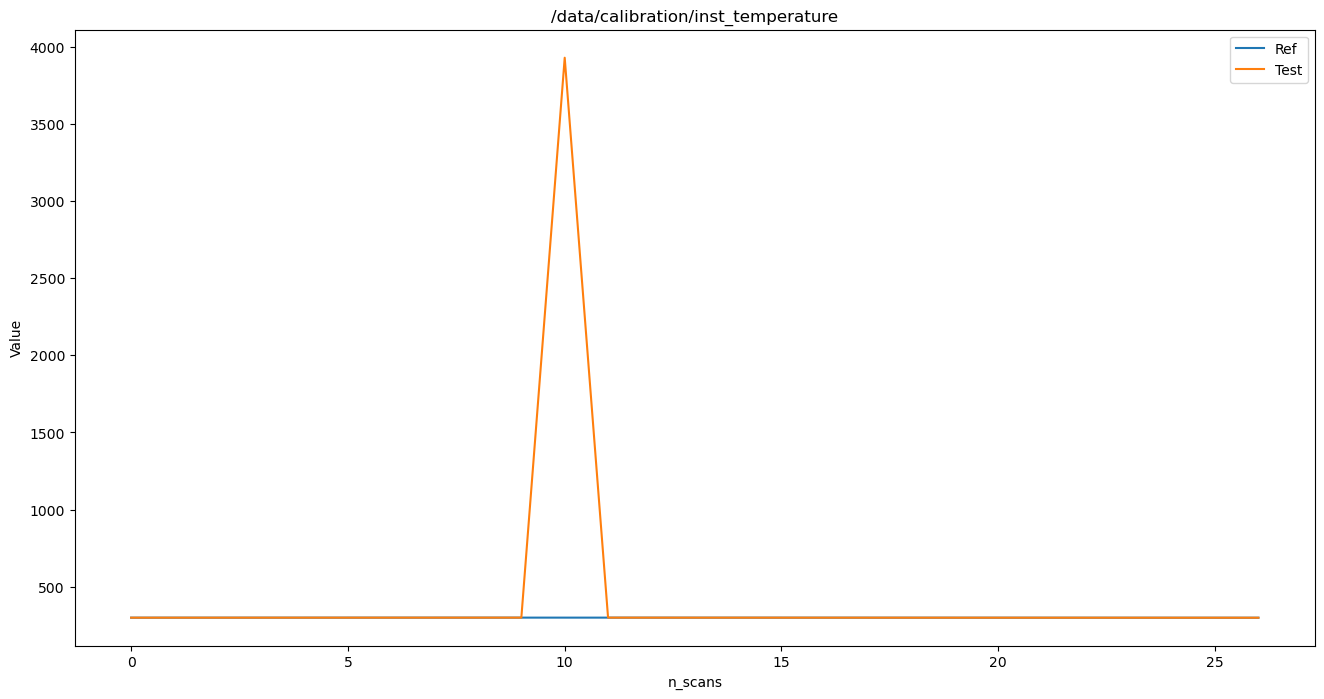

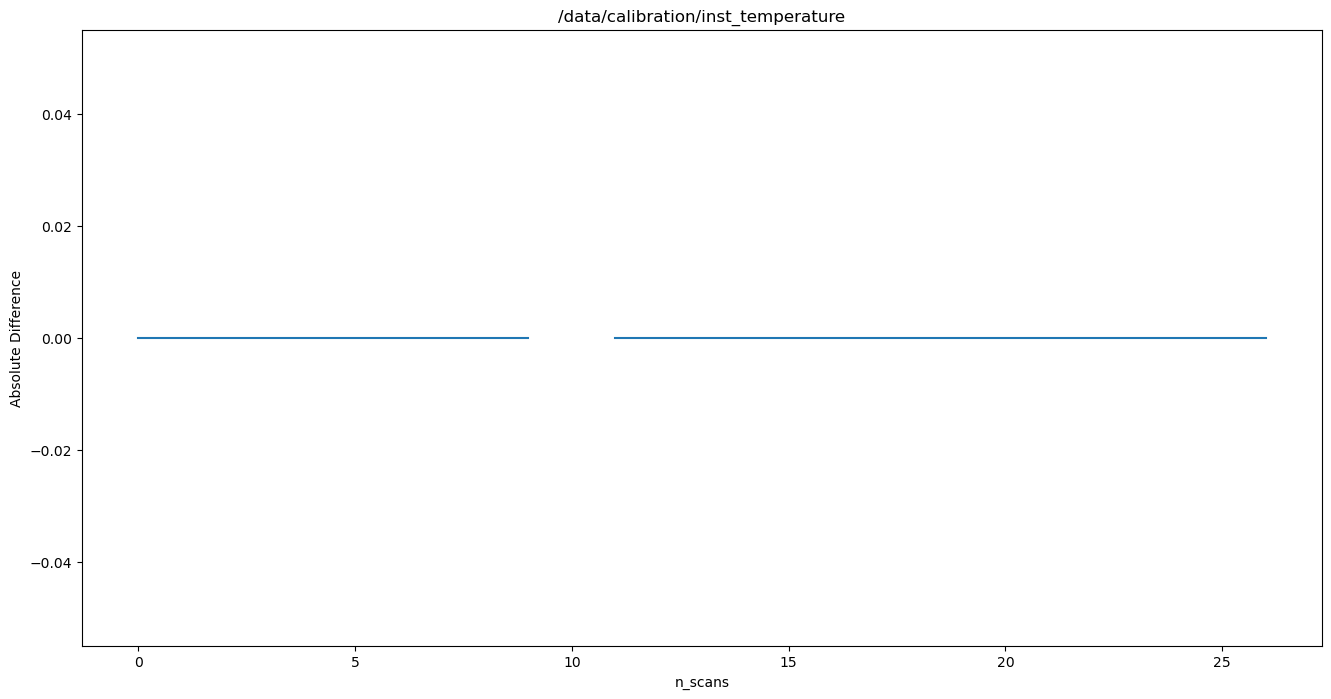

In [8]:
plt.figure(figsize=(16, 8))
plt.xlabel('n_scans')
plt.ylabel('Value')
plt.title('/data/calibration/inst_temperature')
plt.plot(var_2, label="Ref")
plt.plot(var_1, label="Test")
plt.legend(loc="upper right")
plt.show()

plt.figure(figsize=(16, 8))
plt.xlabel('n_scans')
plt.ylabel('Absolute Difference')
plt.title('/data/calibration/inst_temperature')
plt.plot(dif)
plt.show()

# 4. UInt: mws_sce_register_status

In [9]:
test_path = "/mnt/dl380-data/EPS-SG/data/mws_l1_lp/MWSL1LP-SCI-01/TDS-2/output/mws_l1/W_XX-EUMETSAT-Darmstadt,SAT,SGA1-MWS-1B-RAD_C_EUMT_20230810060827_G_D_20070912084758_20070912084859_T_N_ISD.nc"
ref_path  = "/mnt/dl380-data/EPS-SG/data/mws_l1_lp/MWSL1LP-SCI-01/TDS-2/output/mws_l1/W_XX-EUMETSAT-Darmstadt,SAT,SGA1-MWS-1B-RAD_C_EUMT_20230810060827_G_D_20070912084758_20070912084859_T_N____.nc"
var_path  = "/status/instrument/mws_sce_register_status"

# General information
info_sce_t, var_sce_t = read_nc(test_path, var_path)
info_sce_r, var_sce_r = read_nc(ref_path, var_path)
print("Test file:\n\n", info_sce_t,"\n")
print("Number of Samples:", len(var_sce_t.flatten()))
print("----------------------\nReference file:\n")
print(info_sce_r,"\n")
print("Number of Samples:", len(var_sce_r.flatten()))
print("-"*127)

# Statistics
var_1 = var_sce_t.data.flatten()
var_2 = var_sce_r.data.flatten()
mean, minim, maxim, rsm, dif = stats(var_1, var_2)
print("Statistics for mws_sce_register_status:")
print(" Mean:", mean, "\n Minimum:", minim, "\n Maximum:", maxim, "\n RSM:", rsm)
print("-"*127)

# NaN values
print("NaN occurances")
search_nan(var_1, var_2)
print("-"*127)
print("Discrepancies\n ---------------------")
count = 0
thresh = 0
for i in range(len(var_1)):
    if var_1[i] != var_2[i]:
        abs_dif = abs(var_1[i] - var_2[i])
        print(" Index:", i)
        print(" Ref Value:", var_2[i])
        print(" Test Value:", var_1[i])
        print(" Abs Difference:", abs_dif)
        if abs_dif > thresh:
            count +=1
            print(" Outside Tolerance: Yes")
        else:
            print(" Outside Tolerance: No")
        print(" ----------------------")
print("-"*127)
print("Total Discrepancies outside tolerance:", count)

Test file:

 <class 'netCDF4._netCDF4.Variable'>
uint32 mws_sce_register_status(n_scans)
    long_name: MWS Scan Control Electronics (SCE) register status. Bitwise value: 0 = Not Active, 1 = Active
path = /status/instrument
unlimited dimensions: 
current shape = (27,)
filling on, default _FillValue of 4294967295 used 

Number of Samples: 27
----------------------
Reference file:

<class 'netCDF4._netCDF4.Variable'>
uint32 mws_sce_register_status(n_scans)
    long_name: MWS Scan Control Electronics (SCE) register status. Bitwise value: 0 = Not Active, 1 = Active
path = /status/instrument
unlimited dimensions: 
current shape = (27,)
filling on, default _FillValue of 4294967295 used 

Number of Samples: 27
-------------------------------------------------------------------------------------------------------------------------------
Statistics for mws_sce_register_status:
 Mean: 2.222e+05 
 Minimum: 2.000e+06 
 Maximum: 2.000e+06 
 RSM: 6.667e+05
-------------------------------------------

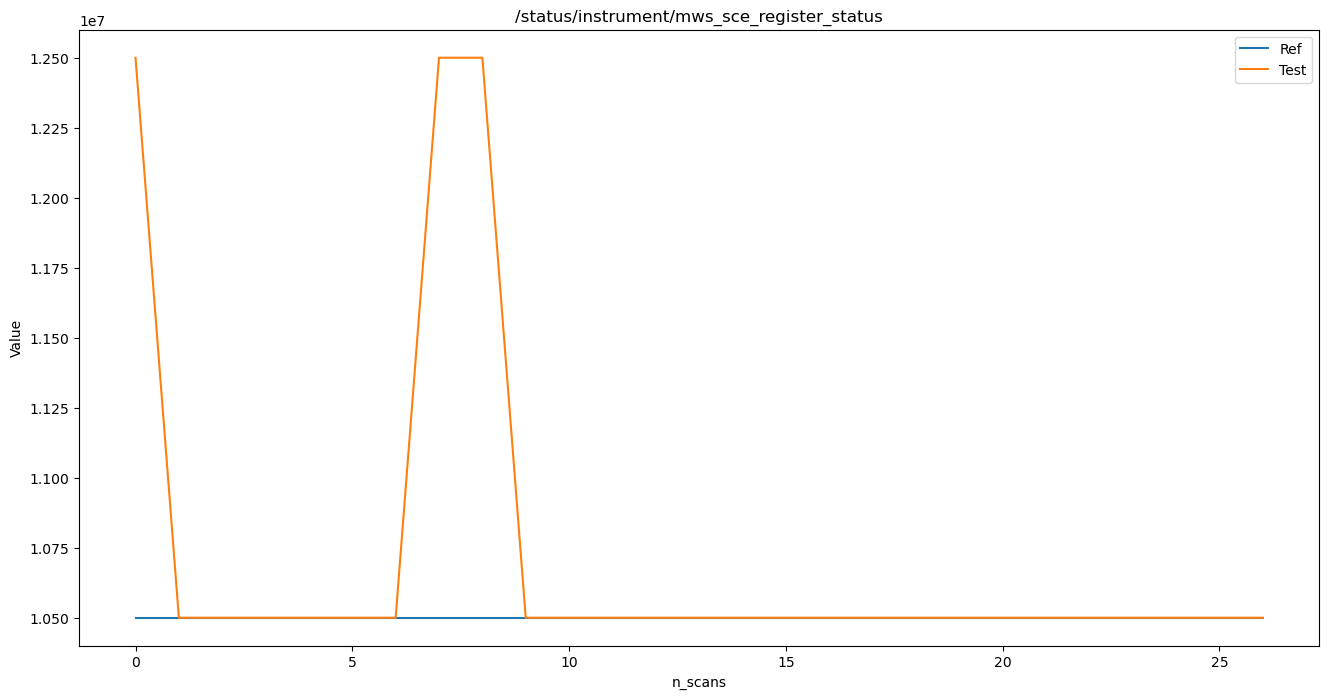

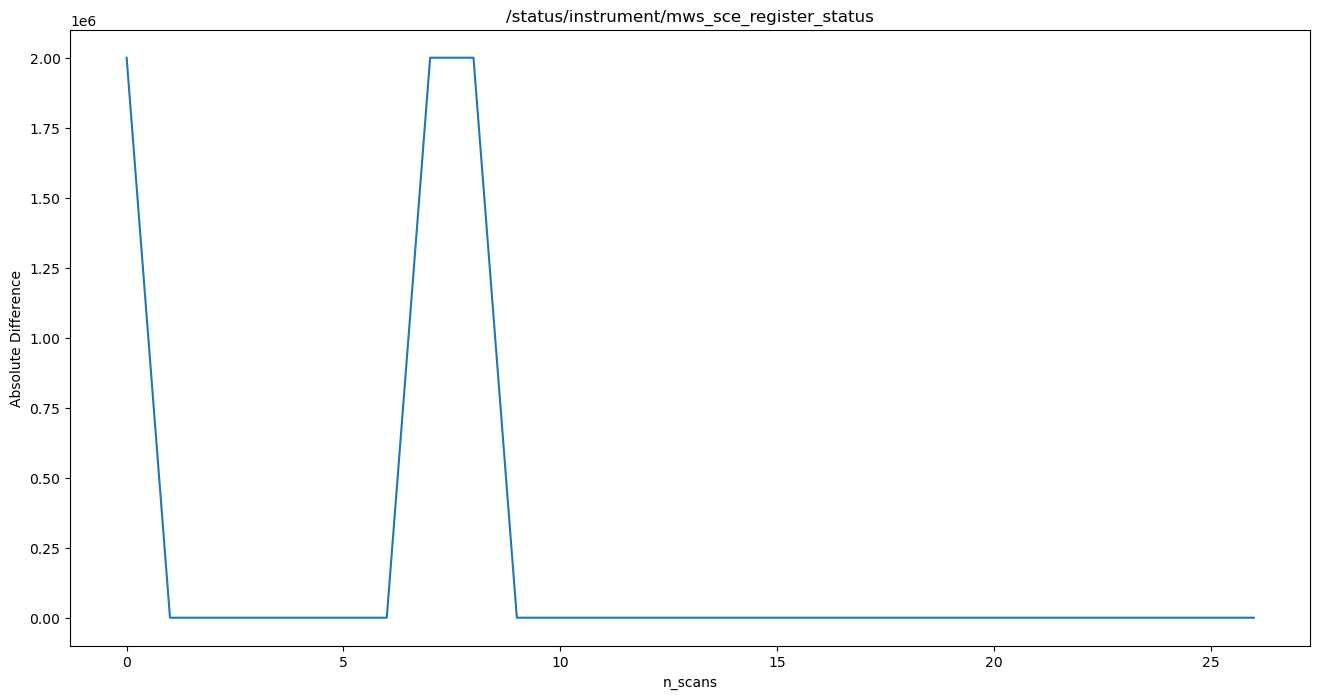

In [10]:
plt.figure(figsize=(16, 8))
plt.xlabel('n_scans')
plt.ylabel('Value')
plt.title('/status/instrument/mws_sce_register_status')
plt.plot(var_2, label="Ref")
plt.plot(var_1, label="Test")
plt.legend(loc="upper right")
plt.show()

plt.figure(figsize=(16, 8))
plt.xlabel('n_scans')
plt.ylabel('Absolute Difference')
plt.title('/status/instrument/mws_sce_register_status')
plt.plot(dif)
plt.show()

# 5. UInt64: mws_function_status (Manually solved)

In [11]:
test_path = "/mnt/dl380-data/EPS-SG/data/mws_l1_lp/MWSL1LP-SCI-01/TDS-2/output/mws_l1/W_XX-EUMETSAT-Darmstadt,SAT,SGA1-MWS-1B-RAD_C_EUMT_20230810060827_G_D_20070912084758_20070912084859_T_N_ISD.nc"
ref_path  = "/mnt/dl380-data/EPS-SG/data/mws_l1_lp/MWSL1LP-SCI-01/TDS-2/output/mws_l1/W_XX-EUMETSAT-Darmstadt,SAT,SGA1-MWS-1B-RAD_C_EUMT_20230810060827_G_D_20070912084758_20070912084859_T_N____.nc"
var_path  = "/status/instrument/mws_function_status"

# General information
info_status_t, var_status_t = read_nc(test_path, var_path)
info_status_r, var_status_r = read_nc(ref_path, var_path)
print("Test file:\n\n", info_status_t,"\n")
print("Number of Samples:", len(var_status_t.flatten()))
print("----------------------\nReference file:\n")
print(info_status_r,"\n")
print("Number of Samples:", len(var_status_r.flatten()))
print("-"*127)

# Statistics
var_1 = var_status_t.data.flatten().astype(np.int64)
var_2 = var_status_r.data.flatten().astype(np.int64)
mean, minim, maxim, rsm, dif = stats(var_1, var_2)
print("Statistics for mws_function_status:")
print(" Mean:", mean, "\n Minimum:", minim, "\n Maximum:", maxim, "\n RSM:", rsm)
print("-"*127)

# NaN values
print("NaN occurances")
search_nan(var_1, var_2)
print("-"*127)
print("Discrepancies\n ---------------------")
count = 0
thresh = 0
for i in range(len(var_1)):
    if var_1[i] != var_2[i]:
        if var_1[i] > var_2[i]:
            abs_dif = (var_1[i] - var_2[i]).astype(np.int64)
        else:
            abs_dif = (var_2[i] - var_1[i]).astype(np.int64)
        print(" Index:", i)
        print(" Ref Value:", var_2[i])
        print(" Test Value:", var_1[i])
        print(" Abs Difference:", abs_dif)
        if abs_dif > thresh:
            count +=1
            print(" Outside Tolerance: Yes")
        else:
            print(" Outside Tolerance: No")
        print(" ----------------------")
print("-"*127)
print("Total Discrepancies outside tolerance:", count)

Test file:

 <class 'netCDF4._netCDF4.Variable'>
uint64 mws_function_status(n_scans)
    long_name: Tm(3,25) Function Status: provides the status of the identified function
path = /status/instrument
unlimited dimensions: 
current shape = (27,)
filling on, default _FillValue of 18446744073709551614 used 

Number of Samples: 27
----------------------
Reference file:

<class 'netCDF4._netCDF4.Variable'>
uint64 mws_function_status(n_scans)
    long_name: Tm(3,25) Function Status: provides the status of the identified function
path = /status/instrument
unlimited dimensions: 
current shape = (27,)
filling on, default _FillValue of 18446744073709551614 used 

Number of Samples: 27
-------------------------------------------------------------------------------------------------------------------------------
Statistics for mws_function_status:
 Mean: -5.926e+17 
 Minimum: 8.000e+18 
 Maximum: 0.000e+00 
 RSM: 2.177e+18
----------------------------------------------------------------------------

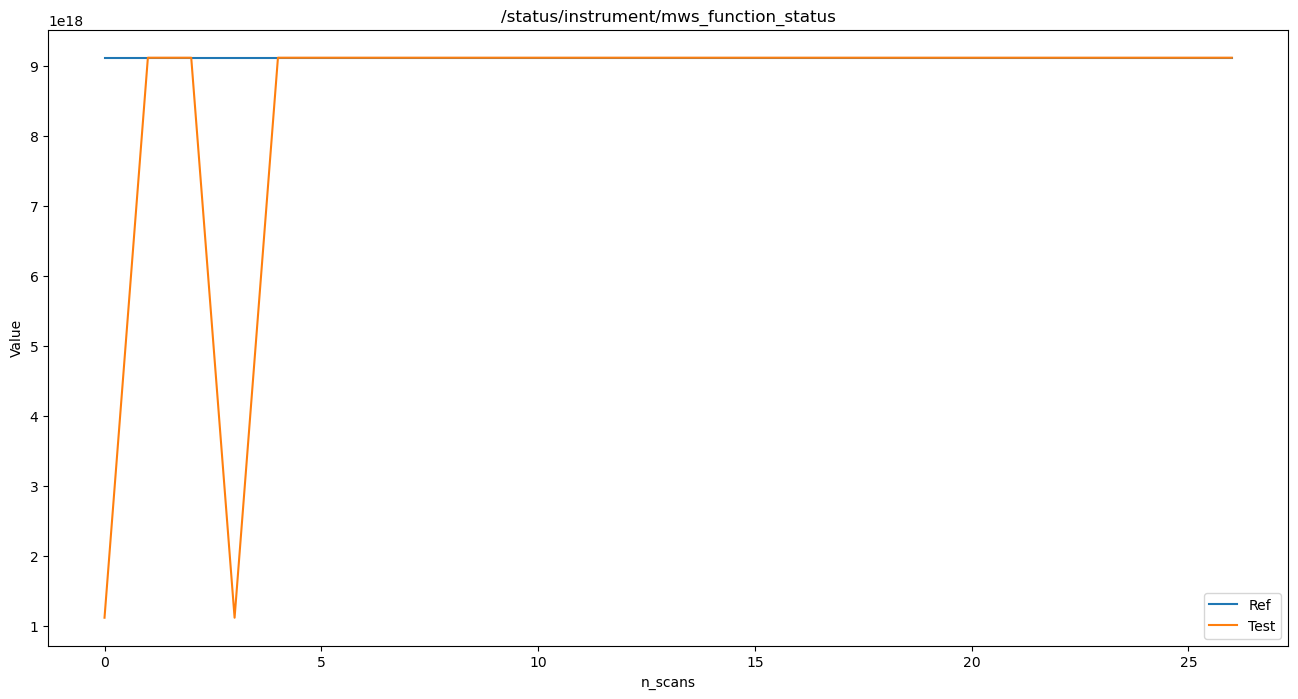

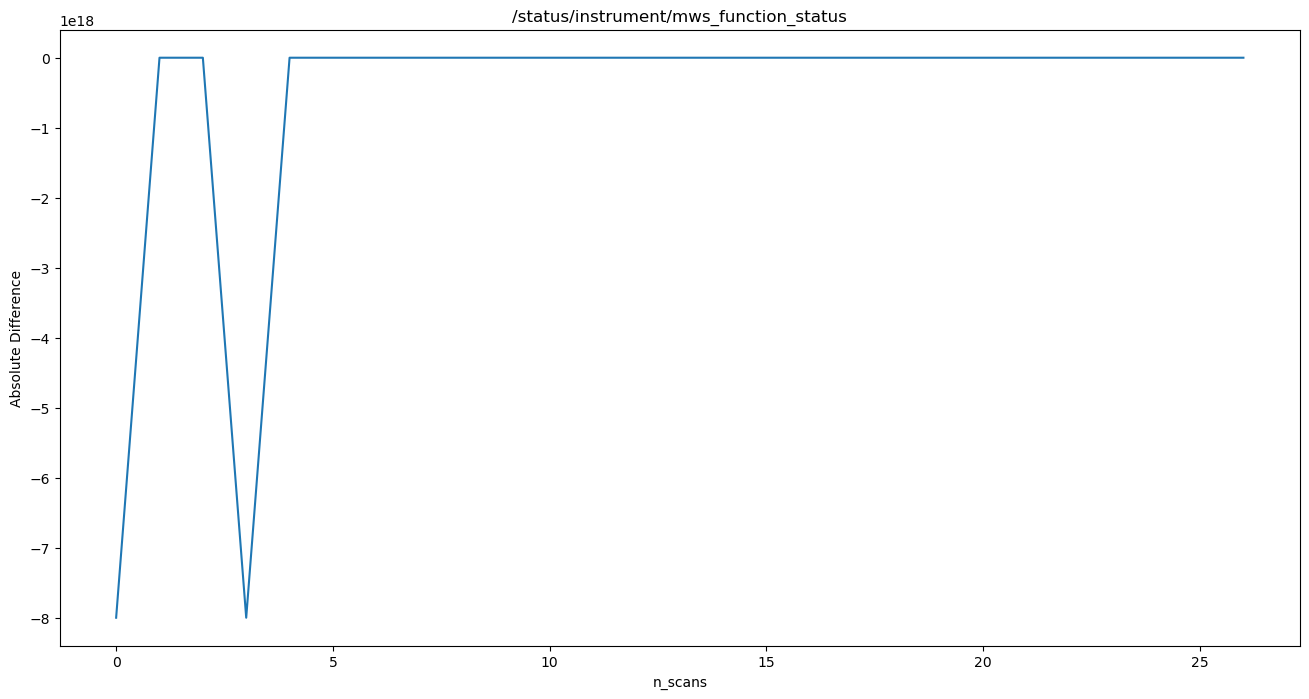

In [12]:
plt.figure(figsize=(16, 8))
plt.xlabel('n_scans')
plt.ylabel('Value')
plt.title('/status/instrument/mws_function_status')
plt.plot(var_2, label="Ref")
plt.plot(var_1, label="Test")
plt.legend(loc="lower right")
plt.show()

plt.figure(figsize=(16, 8))
plt.xlabel('n_scans')
plt.ylabel('Absolute Difference')
plt.title('/status/instrument/mws_function_status')
plt.plot(dif)
plt.show()

# 6. Double: semi_major_axis (Partly Solved)

In [13]:
test_path = "/mnt/dl380-data/EPS-SG/data/mws_l1_lp/MWSL1LP-SCI-01/TDS-2/output/mws_l1/W_XX-EUMETSAT-Darmstadt,SAT,SGA1-MWS-1B-RAD_C_EUMT_20230810060827_G_D_20070912084758_20070912084859_T_N_ISD.nc"
ref_path  = "/mnt/dl380-data/EPS-SG/data/mws_l1_lp/MWSL1LP-SCI-01/TDS-2/output/mws_l1/W_XX-EUMETSAT-Darmstadt,SAT,SGA1-MWS-1B-RAD_C_EUMT_20230810060827_G_D_20070912084758_20070912084859_T_N____.nc"
var_path  = "/status/satellite/semi_major_axis"

# General information
info_axis_t, var_axis_t = read_nc(test_path, var_path)
info_axis_r, var_axis_r = read_nc(ref_path, var_path)
print("Test file:\n\n", info_axis_t,"\n")
print("Value:", var_axis_t)
print("----------------------\nReference file:\n")
print(info_axis_r,"\n")
print("Value:", var_axis_r)
print("-"*127)

# Statistics
var_1 = var_axis_t.data.flatten()
var_2 = var_axis_r.data.flatten()
mean, minim, maxim, rsm, dif = stats(var_1, var_2)
print("Statistics for semi_major_axis:")
print(" Mean:", mean, "\n Minimum:", minim, "\n Maximum:", maxim, "\n RSM:", rsm)
print("-"*127)

# NaN occurances & New Statistics
vmax = info_axis_t.getncattr("valid_max")
vmin = info_axis_t.getncattr("valid_min")
miss = info_axis_t.getncattr("missing_value")
# Apply Scale Factor
new_var_t = var_axis_t.data
new_var_r = var_axis_r.data
print("new_var_t", new_var_t, "\nnew_var_r", new_var_r)
# Apply Masks
mask_t = np.logical_or(new_var_t < vmin, new_var_t > vmax)
mask_r = np.logical_or(new_var_r < vmin, new_var_r > vmax)
mask = np.logical_or(mask_t, mask_r)
mask_var_t = np.where(mask, np.nan, new_var_t)
mask_var_r = np.where(mask, np.nan, new_var_r)
# NaN values
print("Total NaN occurances:", np.sum(mask_t) + np.sum(mask_r))
print("Test NaN occurances:", np.sum(mask_t))
print("Ref NaN occurances:", np.sum(mask_r))
print("-"*127)
if np.isnan(mask_var_r).all() or np.isnan(mask_var_t).all():
    mean, minim, maxim, rsm = -1, -1, -1, -1
else:
    mean, minim, maxim, rsm, dif = stats_nan(mask_var_t, mask_var_r)
print("NEW Statistics for inst_temperature:")
print(" Mean:", mean, "\n Minimum:", minim, "\n Maximum:", maxim, "\n RSM:", rsm)
print("-"*127)

print("-"*127)
print("Discrepancies\n ---------------------")
count = 0
thresh = 85
for i in range(len(var_1)):
    if var_1[i] != var_2[i]:
        abs_dif = abs(var_1[i] - var_2[i])
        print(" Index:", i)
        print(" Ref Value:", var_2[i])
        print(" Test Value:", var_1[i])
        print(" Abs Difference:", abs_dif)
        if abs_dif > thresh:
            count +=1
            print(" Outside Tolerance: Yes")
        else:
            print(" Outside Tolerance: No")
        print(" ----------------------")
print("-"*127)
print("Total Discrepancies outside tolerance:", count)

Test file:

 <class 'netCDF4._netCDF4.Variable'>
float64 semi_major_axis()
    long_name: Semi major axis of the orbit at epoch time [TOD]
    units: m
    valid_min: 6500000.0
    valid_max: 8000000.0
    missing_value: -9000000.0
path = /status/satellite
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of 9.969209968386869e+36 used 

Value: --
----------------------
Reference file:

<class 'netCDF4._netCDF4.Variable'>
float64 semi_major_axis()
    long_name: Semi major axis of the orbit at epoch time [TOD]
    units: m
    valid_min: 6500000.0
    valid_max: 8000000.0
    missing_value: -9000000.0
path = /status/satellite
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of 9.969209968386869e+36 used 

Value: 7198177.670221893
-------------------------------------------------------------------------------------------------------------------------------
Statistics for semi_major_axis:
 Mean: -7.198e+06 
 Minimum: 7.198e+06 
 Maximum: 7.19

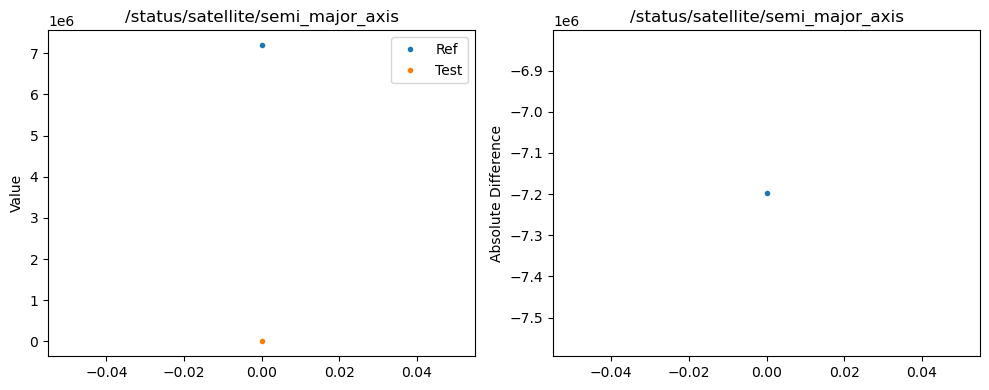

In [14]:
# Create a 1x2 grid for subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first subplot in the first column
axs[0].plot(var_2, ".", label="Ref")
axs[0].plot(var_1, ".", label="Test")
axs[0].legend(loc="upper right")
axs[0].set_title('/status/satellite/semi_major_axis')
axs[0].set_ylabel('Value')

# Plot the second subplot in the second column
axs[1].plot(dif, ".")
axs[1].set_title('/status/satellite/semi_major_axis')
axs[1].set_ylabel('Absolute Difference')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# 7. Float: channel_central_freq

In [15]:
test_path = "/mnt/dl380-data/EPS-SG/data/mws_l1_lp/MWSL1LP-SCI-01/TDS-2/output/mws_l1/W_XX-EUMETSAT-Darmstadt,SAT,SGA1-MWS-1B-RAD_C_EUMT_20230810060827_G_D_20070912084758_20070912084859_T_N_ISD.nc"
ref_path  = "/mnt/dl380-data/EPS-SG/data/mws_l1_lp/MWSL1LP-SCI-01/TDS-2/output/mws_l1/W_XX-EUMETSAT-Darmstadt,SAT,SGA1-MWS-1B-RAD_C_EUMT_20230810060827_G_D_20070912084758_20070912084859_T_N____.nc"
var_path  = "/status/instrument/channel_central_freq"

# General information
info_freq_t, var_freq_t = read_nc(test_path, var_path)
info_freq_r, var_freq_r = read_nc(ref_path, var_path)
print("Test file:\n\n", info_freq_t,"\n")
print("Number of Samples:", len(var_freq_t.flatten()))
print("----------------------\nReference file:\n")
print(info_freq_r,"\n")
print("Number of Samples:", len(var_freq_r.flatten()))
print("-"*127)

# Statistics
var_1 = var_freq_t.data.flatten()
var_2 = var_freq_r.data.flatten()
mean, minim, maxim, rsm, dif = stats(var_1, var_2)
print("Statistics for channel_central_freq:")
print(" Mean:", mean, "\n Minimum:", minim, "\n Maximum:", maxim, "\n RSM:", rsm)
print("-"*127)

# NaN values
print("NaN occurances")
search_nan(var_1, var_2)
print("-"*127)
print("Discrepancies\n ---------------------")
for i in range(len(var_1)):
    if var_1[i] != var_2[i]:
        print(" Index:", i)
        print(" Ref Value:", var_2[i])
        print(" Test Value:", var_1[i])
        print(" ---------------------")

Test file:

 <class 'netCDF4._netCDF4.Variable'>
float32 channel_central_freq(n_channels)
    long_name: Central frequency of MWS channels
    units: GHz
path = /status/instrument
unlimited dimensions: 
current shape = (24,)
filling on, default _FillValue of 9.969209968386869e+36 used 

Number of Samples: 24
----------------------
Reference file:

<class 'netCDF4._netCDF4.Variable'>
float32 channel_central_freq(n_channels)
    long_name: Central frequency of MWS channels
    units: GHz
path = /status/instrument
unlimited dimensions: 
current shape = (24,)
filling on, default _FillValue of 9.969209968386869e+36 used 

Number of Samples: 24
-------------------------------------------------------------------------------------------------------------------------------
Statistics for channel_central_freq:
 Mean: 4.167e+00 
 Minimum: 3.815e-06 
 Maximum: 1.000e+02 
 RSM: 2.041e+01
----------------------------------------------------------------------------------------------------------------

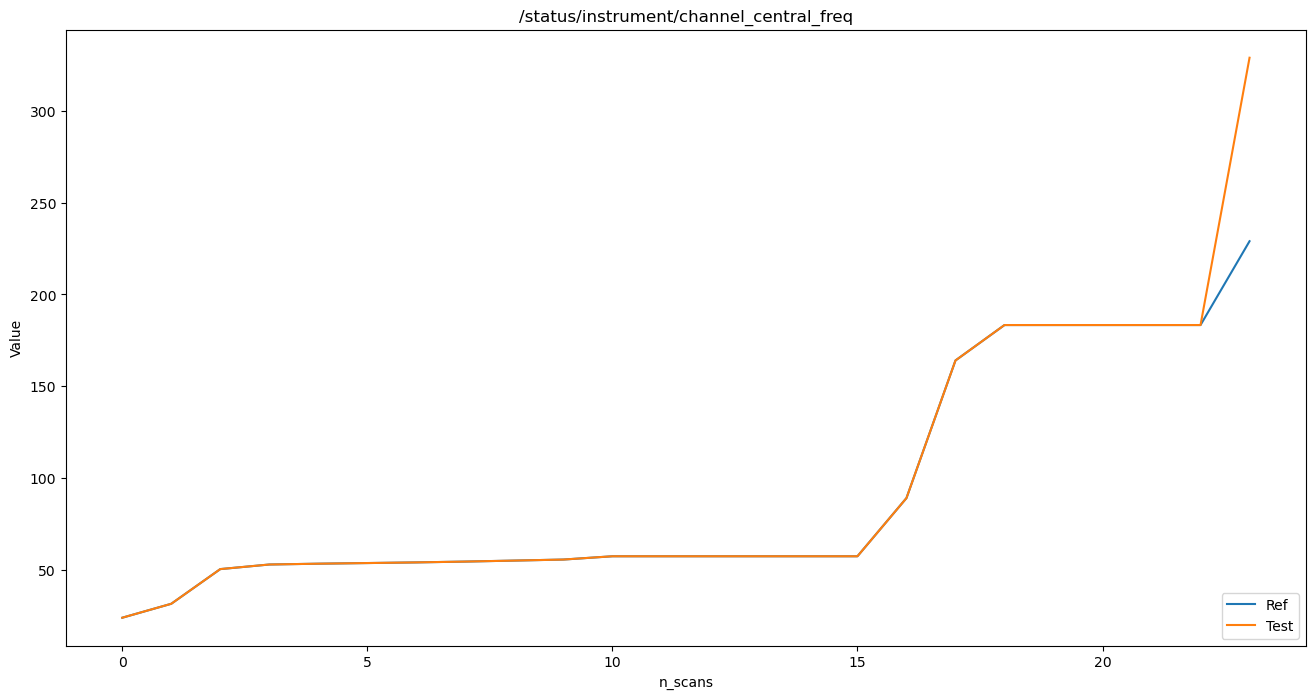

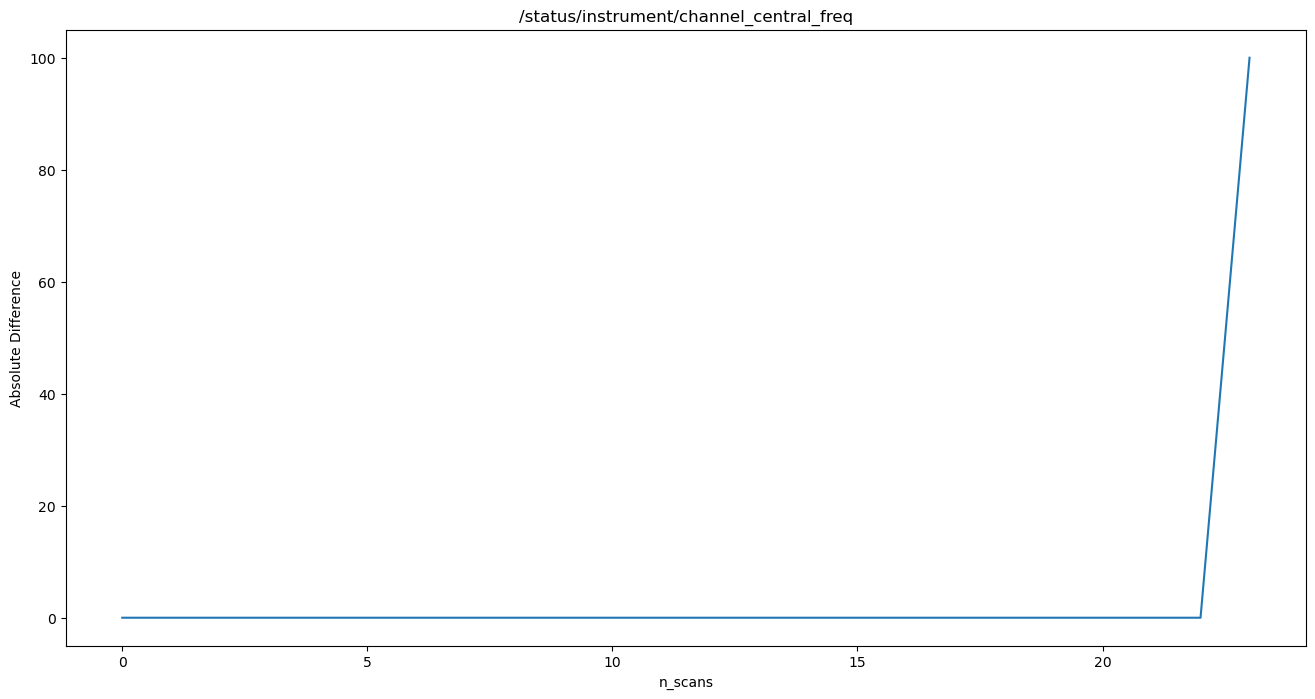

In [16]:
plt.figure(figsize=(16, 8))
plt.xlabel('n_scans')
plt.ylabel('Value')
plt.title('/status/instrument/channel_central_freq')
plt.plot(var_2, label="Ref")
plt.plot(var_1, label="Test")
plt.legend(loc="lower right")
plt.show()

plt.figure(figsize=(16, 8))
plt.xlabel('n_scans')
plt.ylabel('Absolute Difference')
plt.title('/status/instrument/channel_central_freq')
plt.plot(dif)
plt.show()

# 8. Byte: manoeuvre_items

In [17]:
# test_path = "/mnt/dl380-data/EPS-SG/data/mws_l1_lp/MWSL1LP-SCI-01/TDS-2/output/mws_l1/W_XX-EUMETSAT-Darmstadt,SAT,SGA1-MWS-1B-RAD_C_EUMT_20230810060827_G_D_20070912084758_20070912084859_T_N_ISD.nc"
# ref_path  = "/mnt/dl380-data/EPS-SG/data/mws_l1_lp/MWSL1LP-SCI-01/TDS-2/output/mws_l1/W_XX-EUMETSAT-Darmstadt,SAT,SGA1-MWS-1B-RAD_C_EUMT_20230810060827_G_D_20070912084758_20070912084859_T_N____.nc"
# var_path  = "/status/satellite/manoeuvre_items"

# # General information
# info_mano_t, var_mano_t = read_nc(test_path, var_path)
# info_mano_r, var_mano_r = read_nc(ref_path, var_path)
# print("Test file:\n\n", info_mano_t,"\n")
# print("Number of Samples:", len(var_mano_r.flatten()))
# print("----------------------\nReference file:\n")
# print(info_mano_r,"\n")
# print("Number of Samples:", len(var_mano_r.flatten()))
# print("-"*127)

# # Statistics
# var_1 = var_mano_t.data.flatten()
# var_2 = var_mano_r.data.flatten()
# mean, minim, maxim, rsm, dif = stats(var_1, var_2)
# print("Statistics for manoeuvre_items:")
# print(" Mean:", mean, "\n Minimum:", minim, "\n Maximum:", maxim, "\n RSM:", rsm)
# print("-"*127)

# # NaN values
# print("NaN occurances")
# search_nan(var_1, var_2)
# print("-"*127)
# print("Discrepancies\n ---------------------")
# for i in range(len(var_1)):
#     if var_1[i] != var_2[i]:
#         print(" Index:", i)
#         print(" Ref Value:", var_2[i])
#         print(" Test Value:", var_1[i])
#         print(" ---------------------")

# 9. UByte: mws_icu_in_use

In [18]:
test_path = "/mnt/dl380-data/EPS-SG/data/mws_l1_lp/MWSL1LP-SCI-01/TDS-2/output/mws_l1/W_XX-EUMETSAT-Darmstadt,SAT,SGA1-MWS-1B-RAD_C_EUMT_20230810060827_G_D_20070912084758_20070912084859_T_N_ISD.nc"
ref_path  = "/mnt/dl380-data/EPS-SG/data/mws_l1_lp/MWSL1LP-SCI-01/TDS-2/output/mws_l1/W_XX-EUMETSAT-Darmstadt,SAT,SGA1-MWS-1B-RAD_C_EUMT_20230810060827_G_D_20070912084758_20070912084859_T_N____.nc"
var_path  = "/status/instrument/mws_icu_in_use"

# General information
info_icu_t, var_icu_t = read_nc(test_path, var_path)
info_icu_r, var_icu_r = read_nc(ref_path, var_path)
print("Test file:\n\n", info_icu_t,"\n")
print("Number of Samples:", len(var_icu_t.flatten()))
print("----------------------\nReference file:\n")
print(info_icu_r,"\n")
print("Number of Samples:", len(var_icu_r.flatten()))
print("-"*127)

# Statistics
var_1 = var_icu_t.data.flatten()
var_2 = var_icu_r.data.flatten()
mean, minim, maxim, rsm, dif = stats(var_1, var_2)
print("Statistics for mws_icu_in_use:")
print(" Mean:", mean, "\n Minimum:", minim, "\n Maximum:", maxim, "\n RSM:", rsm)
print("-"*127)

# NaN values
print("NaN occurances")
search_nan(var_1, var_2)
print("-"*127)
print("Discrepancies\n ---------------------")
count = 0
thresh = 0
for i in range(len(var_1)):
    if var_1[i] != var_2[i]:
        abs_dif = abs(var_1[i] - var_2[i])
        print(" Index:", i)
        print(" Ref Value:", var_2[i])
        print(" Test Value:", var_1[i])
        print(" Abs Difference:", abs_dif)
        if abs_dif > thresh:
            count +=1
            print(" Outside Tolerance: Yes")
        else:
            print(" Outside Tolerance: No")
        print(" ----------------------")
print("-"*127)
print("Total Discrepancies outside tolerance:", count)

Test file:

 <class 'netCDF4._netCDF4.Variable'>
uint8 mws_icu_in_use(n_scans)
    long_name: Identifier of the Instrument Control Unit (ICU) being used with respect to its redundancy
path = /status/instrument
unlimited dimensions: 
current shape = (27,)
filling on, default _FillValue of 255 ignored 

Number of Samples: 27
----------------------
Reference file:

<class 'netCDF4._netCDF4.Variable'>
uint8 mws_icu_in_use(n_scans)
    long_name: Identifier of the Instrument Control Unit (ICU) being used with respect to its redundancy
path = /status/instrument
unlimited dimensions: 
current shape = (27,)
filling on, default _FillValue of 255 ignored 

Number of Samples: 27
-------------------------------------------------------------------------------------------------------------------------------
Statistics for mws_icu_in_use:
 Mean: 3.704e-02 
 Minimum: 1.000e+00 
 Maximum: 1.000e+00 
 RSM: 1.925e-01
----------------------------------------------------------------------------------------

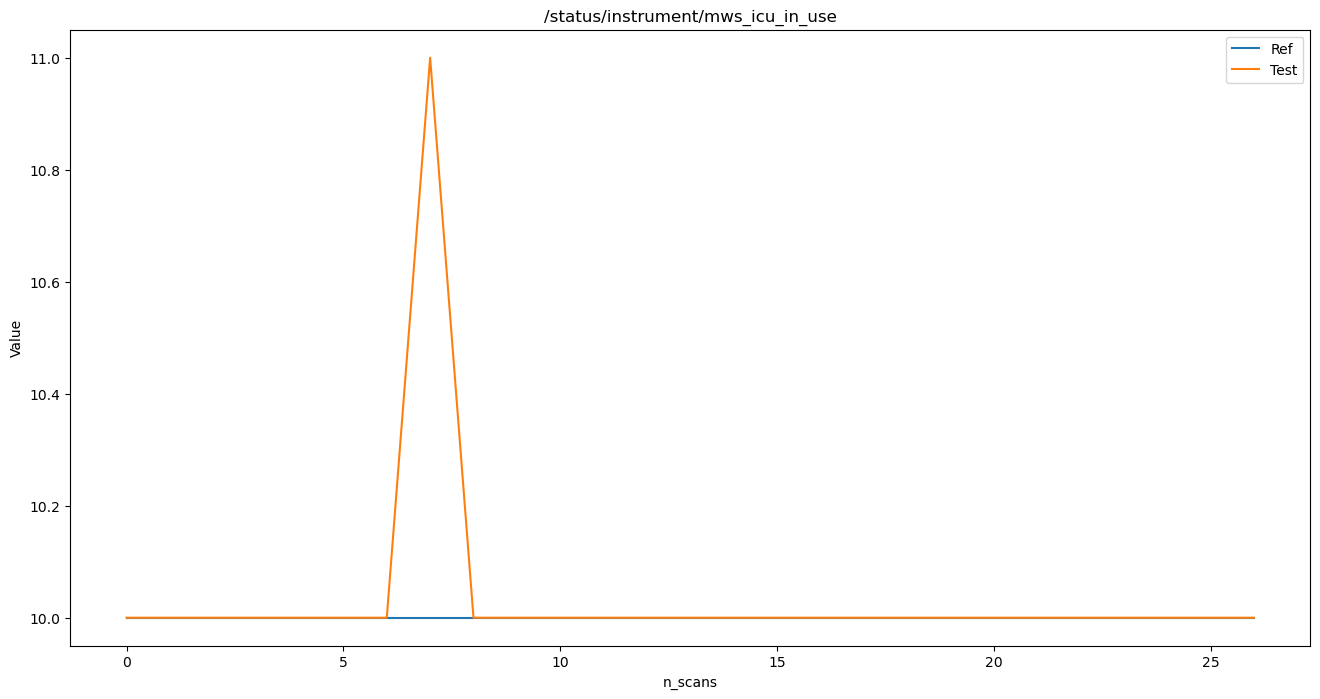

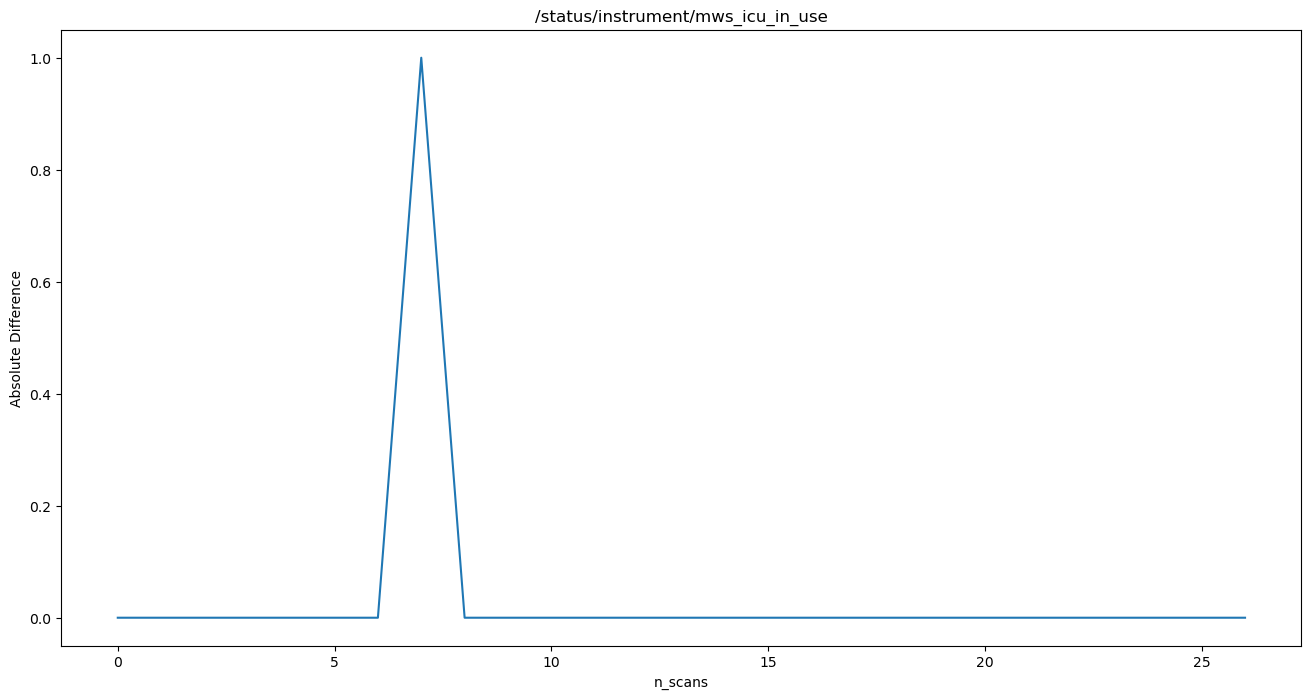

In [19]:
plt.figure(figsize=(16, 8))
plt.xlabel('n_scans')
plt.ylabel('Value')
plt.title('/status/instrument/mws_icu_in_use')
plt.plot(var_2, label="Ref")
plt.plot(var_1, label="Test")
plt.legend(loc="upper right")
plt.show()

plt.figure(figsize=(16, 8))
plt.xlabel('n_scans')
plt.ylabel('Absolute Difference')
plt.title('/status/instrument/mws_icu_in_use')
plt.plot(dif)
plt.show()

# 10. String: instrument_mode

In [20]:
test_path = "/mnt/dl380-data/EPS-SG/data/mws_l1_lp/MWSL1LP-SCI-01/TDS-2/output/mws_l1/W_XX-EUMETSAT-Darmstadt,SAT,SGA1-MWS-1B-RAD_C_EUMT_20230810060827_G_D_20070912084758_20070912084859_T_N_ISD.nc"
ref_path  = "/mnt/dl380-data/EPS-SG/data/mws_l1_lp/MWSL1LP-SCI-01/TDS-2/output/mws_l1/W_XX-EUMETSAT-Darmstadt,SAT,SGA1-MWS-1B-RAD_C_EUMT_20230810060827_G_D_20070912084758_20070912084859_T_N____.nc"
var_path  = "/status/instrument/instrument_mode"

# General information
info_mode_t, var_mode_t = read_nc(test_path, var_path)
info_mode_r, var_mode_r = read_nc(ref_path, var_path)
print("Test file:\n\n", info_mode_t,"\n")
print("Value:", var_mode_t)
print("----------------------\nReference file:\n")
print(info_mode_r,"\n")
print("Value:", var_mode_r)
print("-"*127)

# Statistics
print("Discrepancies\n ---------------------")
var_1, var_2 = var_mode_t[0], var_mode_r[0]
if var_1 == var_2:
    print("Same value.")
else:
    print(" Ref Value :", var_2)
    print(" Test value:", var_1, "\n ---------------------")

Test file:

 <class 'netCDF4._netCDF4.Variable'>
vlen instrument_mode(mode_items)
    long_name: Name of the instrument mode assumed
    missing_value: UNDEFINED MODE
vlen data type: <class 'str'>
path = /status/instrument
unlimited dimensions: 
current shape = (1,) 

Value: ['XXXX']
----------------------
Reference file:

<class 'netCDF4._netCDF4.Variable'>
vlen instrument_mode(mode_items)
    long_name: Name of the instrument mode assumed
    missing_value: UNDEFINED MODE
vlen data type: <class 'str'>
path = /status/instrument
unlimited dimensions: 
current shape = (1,) 

Value: ['SCAN']
-------------------------------------------------------------------------------------------------------------------------------
Discrepancies
 ---------------------
 Ref Value : SCAN
 Test value: XXXX 
 ---------------------
